In [81]:
import numpy as np
import pandas as pd
import string

In [82]:
df = pd.read_csv("datasets\spam1.csv")

In [83]:
df.sample(5)

,v1,v2,3,4,5
86,ham,For real when u getting on yo? I only need 2 m...,NaN,NaN,NaN
529,ham,Jay says that you're a double-faggot,NaN,NaN,NaN
3599,ham,I know you mood off today,NaN,NaN,NaN
1798,ham,That one week leave i put know that time. Why.,NaN,NaN,NaN
442,ham,Oic... I saw him too but i tot he din c me... ...,NaN,NaN,NaN


In [84]:
df.shape

(5572, 5)

In [85]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evalutation
# 6. Improvement

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   3       50 non-null     object
 3   4       12 non-null     object
 4   5       6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [87]:
# drop the last 3 cols
df.drop(columns=['3','4','5'],inplace=True)

In [88]:
df.sample(5)

,v1,v2
5496,ham,Yes... I trust u to buy new stuff ASAP so I ca...
1850,ham,Then cant get da laptop? My matric card wif �_...
2335,ham,Which is weird because I know I had it at one ...
4723,spam,FREE GAME. Get Rayman Golf 4 FREE from the O2 ...
3021,ham,How dare you change my ring


In [89]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4085,ham,Lemme know when you're here
5528,ham,Its just the effect of irritation. Just ignore it
589,ham,"I'm in a meeting, call me later at"
503,ham,Lolnice. I went from a fish to ..water.?
3736,ham,Plz note: if anyone calling from a mobile Co. ...


In [90]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [91]:
df['target'] = encoder.fit_transform(df['target'])

In [92]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [94]:
# check for duplicated values
df.duplicated().sum()

414

In [95]:
# remove duplicates
df = df.drop_duplicates(keep="first")

In [96]:
df.duplicated().sum()

0

In [97]:
df.shape
# end of data cleaning

(5158, 2)

In [98]:
# 2. EDA

df['target'].value_counts()

0    4516
1     642
Name: target, dtype: int64

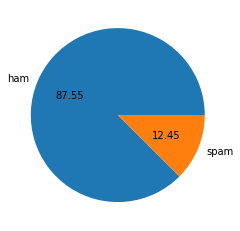

In [99]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [100]:
import nltk

In [101]:
# nltk.download('punkt')

In [102]:
df['num_characters'] = df['text'].apply(len)

In [103]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [104]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [105]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [106]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [107]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [108]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5158.000000,5158.000000,5158.000000
mean,78.781117,18.428848,1.944746
std,58.187760,13.327816,1.360347
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [109]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.420948,17.120903,1.799601
std,56.349697,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [110]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.588785,27.629283,2.965732
std,30.295823,7.052043,1.477468
min,13.000000,2.000000,1.000000
25%,131.250000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [111]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

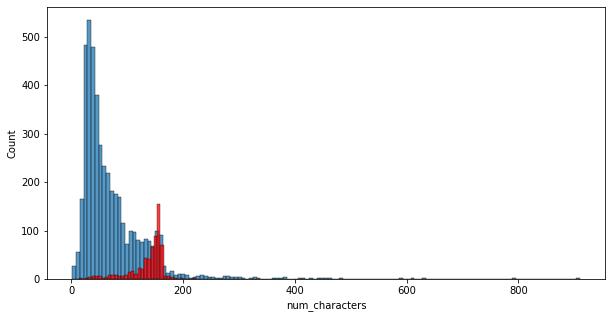

In [112]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

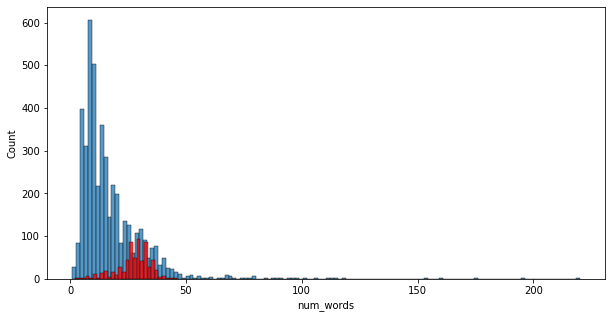

In [113]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

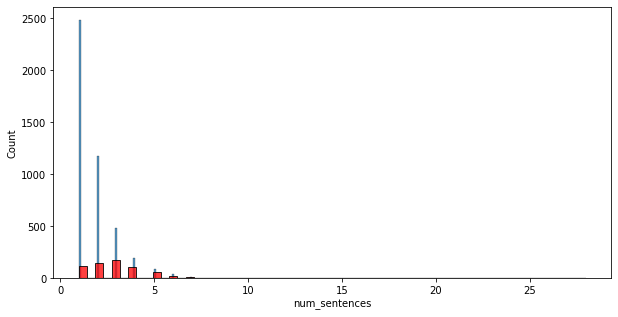

In [114]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

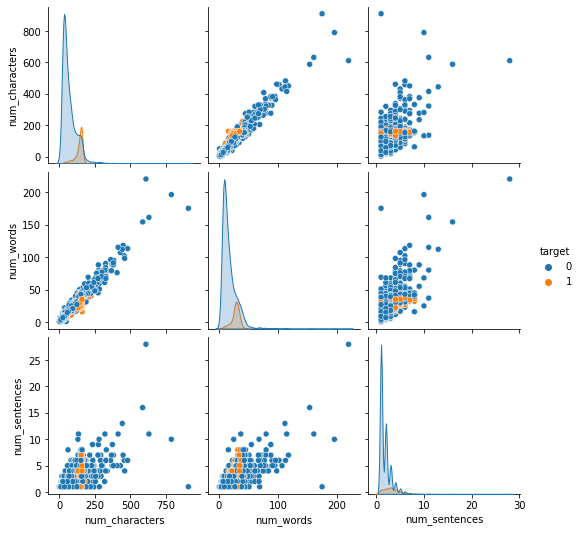

In [115]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

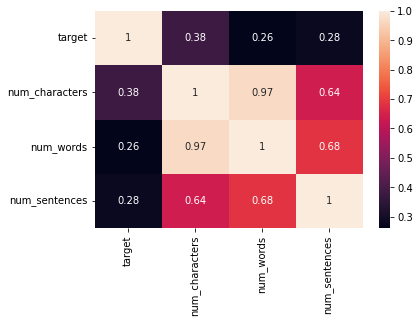

In [116]:
sns.heatmap(df.corr(),annot=True)

In [117]:
# Data preprocessing
#     lowercase conversion
#     tokenization
#     remove spl char.
#     removing punctuation
#     stemming

In [118]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [119]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('forking')

In [120]:
def transform_text(text):
#     lowecase
    text = text.lower()
#     tokenization
    text = nltk.word_tokenize(text)
    
    y = []
    
#     removing spl char
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
#     removing punctuation , frequent stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
#     stemming (eating->eat)
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [121]:
transform_text("Hi how are you sai?")

'hi sai'

In [122]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [123]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [124]:
df['transformed_text'] = df['text'].apply(transform_text)

In [125]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [126]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [127]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

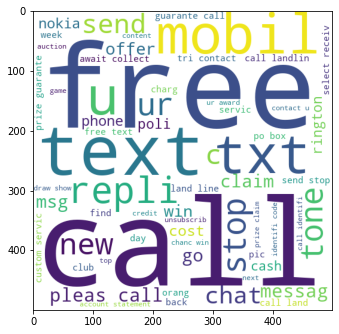

In [128]:
plt.figure(figsize=(11,5.5))
plt.imshow(spam_wc)

In [129]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))

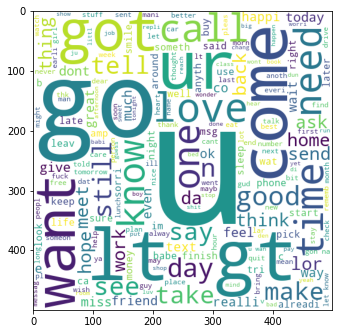

In [130]:
plt.figure(figsize=(11,5.5))
plt.imshow(ham_wc)

In [131]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [132]:
len(spam_corpus)

9767

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'u'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'award'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'contact'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'c'),
  Text(29, 0, 'collect')])

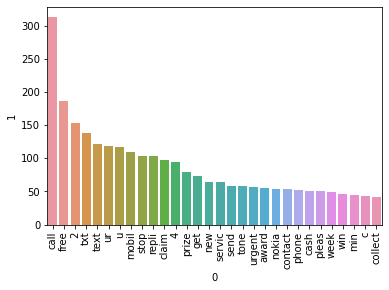

In [133]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [134]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [135]:
len(ham_corpus)

35295

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

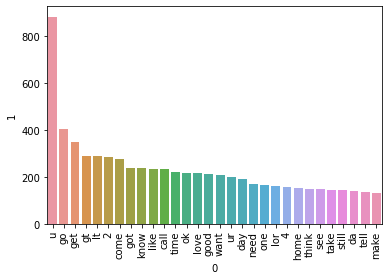

In [136]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [137]:
# 4. Model Building

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [138]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [139]:
x1 = cv.fit_transform(df['transformed_text'][0:5]).toarray()

In [140]:
x1

array([[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [141]:
x1.shape

(5, 51)

In [142]:
X.shape

(5158, 6677)

In [143]:
y = df['target'].values

In [144]:
from sklearn.model_selection import train_test_split

In [153]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

In [154]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [155]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [156]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8624031007751938
[[1178  189]
 [  24  157]]
0.45375722543352603


In [157]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9547803617571059
[[1367    0]
 [  70  111]]
1.0


In [158]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9722222222222222
[[1364    3]
 [  40  141]]
0.9791666666666666


In [159]:
# import pickle
# pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
# pickle.dump(mnb,open("model.pkl",'wb'))
# pickle.dump(transform_text,open("transformer.pkl",'wb'))

In [160]:
# Xin = tfidf.fit_transform(idf[0]).toarray()
# pred = bnb.predict(Xin)